Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Epoch 1/13
300/300 [==============================] - 1s 3ms/step - loss: 1.5452 - acc: 0.3533
Epoch 2/13
300/300 [==============================] - 0s 160us/step - loss: 1.1052 - acc: 0.3967
Epoch 3/13
300/300 [==============================] - 0s 114us/step - loss: 1.1031 - acc: 0.4000
Epoch 4/13
300/300 [==============================] - 0s 196us/step - loss: 0.9895 - acc: 0.4933
Epoch 5/13
300/300 [==============================] - 0s 253us/step - loss: 0.9634 - acc: 0.4933
Epoch 6/13
300/300 [==============================] - 0s 280us/step - loss: 0.9222 - acc: 0.5633
Epoch 7/13
300/300 [==============================] - 0s 227us/step - loss: 0.9120 - acc: 0.5367
Epoch 8/13
300/300 [==============================] - 0s 227us/step - loss: 0.9131 - acc: 0.5367
Epoch 9/13
300/300 [==============================] - 0s 200us/step - loss: 0.8877 - acc: 0.5400
Epoch

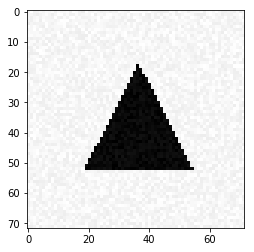

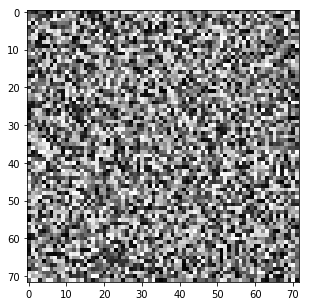

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(72,72), cmap='gray')

im = generate_a_disk(10)
plt.imshow(im.reshape(72,72), cmap='gray')

[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(72,72), cmap='gray')


def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((72,72))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.layers import Convolution2D, MaxPooling2D
from keras import optimizers
from keras.utils import plot_model


 
# Generating the training set 
[X_train, Y_train] = generate_dataset_classification(300,20, True) 
#Converting Y_train to 3 categories
Y_train = np_utils.to_categorical(Y_train, 3)  
 
# Creating  model 
model = Sequential() 
model.add(Dense(32, activation='relu', input_shape=(5184,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

 
# Compiling the model 
#Implementing Adam optimizer
adam=optimizers.Adam(lr=0.001, beta_1=0.99, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 
#Implementation of SGD optimizer
#sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9,nesterov=True)
#model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy']) 

 
# Fitting the model 
model.fit(X_train, Y_train, epochs = 13, batch_size = 32) 
 
#Testing classifier
X_test = generate_a_disk() 
X_test = X_test.reshape(1, X_test.shape[0]) 

print(model.predict(X_test) ) 
 
#Visualising the weights of the linear classifier 
weights = model.get_weights() 
figure, img = plt.subplots(figsize=(5, 5)) 
 
col1 = weights[0][:,0].reshape((72,72)) 
img.imshow(col1, cmap='gray') 
 
col2 = weights[0][:,1].reshape((72, 72)) 
img.imshow(col2, cmap='gray')

col3 = weights[0][:,2].reshape((72, 72)) 
img.imshow(col3, cmap='gray')


